In [16]:
import numpy as np
import pandas as pd
from fitderiv import fitderiv
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2}
sns.set(rc=rc, font_scale=2)

## Load data

In [17]:
# load in the data
data = pd.read_csv("../../data/competition_experiments/plate_reader_data/20200217_growth_test_wt_v_delta.csv",
                   comment='#', header=1)

In [18]:
# convert time to minutes
data.dropna(inplace = True)
data['time'] = np.linspace(0, 1380, 93)/60

# place holder, since data_trimmed is called lated
data_trimmed = data
data_trimmed.head()

,Time,Temp Read 2:600,B2,B3,B4,B5,B6,B7,B8,B9,...,F9,G2,G3,G4,G5,G6,G7,G8,G9,time
0,0:14:35,37.1,0.033,0.033,0.033,0.031,0.033,0.032,0.032,0.031,...,0.031,0.033,0.033,0.032,0.031,0.033,0.033,0.032,0.030,0.00
1,0:29:35,37.1,0.033,0.033,0.033,0.031,0.032,0.032,0.032,0.031,...,0.031,0.033,0.033,0.033,0.031,0.033,0.033,0.033,0.031,0.25
2,0:44:35,37.0,0.033,0.033,0.033,0.031,0.032,0.032,0.033,0.031,...,0.031,0.033,0.033,0.032,0.031,0.033,0.033,0.033,0.031,0.50
3,0:59:35,37.0,0.033,0.033,0.033,0.031,0.032,0.033,0.032,0.031,...,0.031,0.033,0.033,0.032,0.031,0.033,0.033,0.033,0.031,0.75
4,1:14:35,37.1,0.033,0.033,0.033,0.031,0.033,0.032,0.033,0.031,...,0.031,0.033,0.033,0.032,0.031,0.033,0.032,0.032,0.031,1.00


## Plot the data

In [19]:
# create a list of names of replicates for each condition.
wt_gly = ["B2", "C2", "D2", "E2", "F2", "G2"]
wt_lac = ["B3", "C3", "D3", "E3", "F3", "G3"]
wt_both = ["B4", "C4", "D4", "E4", "F4", "G4"]
delta_gly = ["B6", "C6", "D6", "E6", "F6", "G6"]
delta_lac = ["B7", "C7", "D7", "E7", "F7", "G7"]
# D9 was plated instead of D8 because water was accidentally added into D8
delta_both = ["B8", "C8", "D9", "E8", "F8", "G8"]

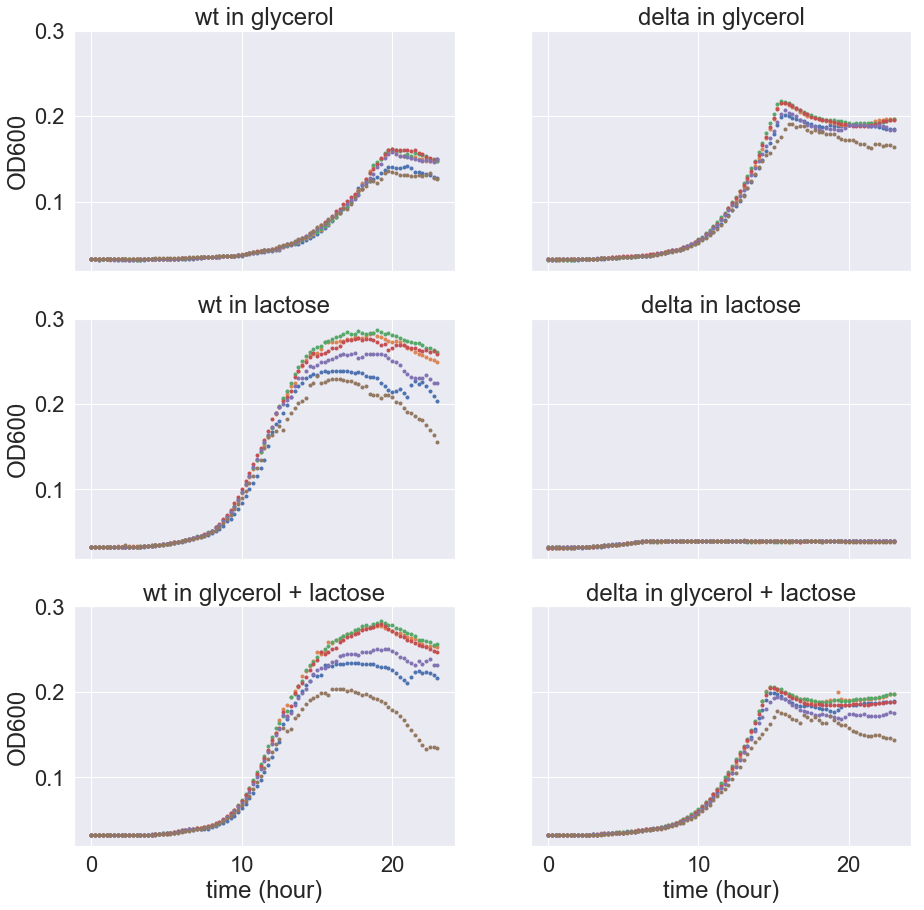

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15,15), sharex=True, sharey=True)

# plot all variants of wt_gly
for well in wt_gly:
    axes[0,0].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[0,0].set_title("wt in glycerol")
axes[0,0].set_ylabel("OD600")
#axes[0,0].legend()
    
for well in wt_lac:
    axes[1,0].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[1,0].set_title("wt in lactose")
axes[1,0].set_ylabel("OD600")
#axes[1,0].legend()
    
for well in wt_both:
    axes[2,0].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[2,0].set_title("wt in glycerol + lactose")
axes[2,0].set_ylabel("OD600")
axes[2,0].set_xlabel("time (hour)")
#axes[2,0].legend()
    
for well in delta_gly:
    axes[0,1].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[0,1].set_title("delta in glycerol")
#axes[0,1].legend()
    
for well in delta_lac:
    axes[1,1].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[1,1].set_title("delta in lactose")
#axes[1,1].legend()
    
for well in delta_both:
    axes[2,1].plot(data_trimmed['time'], data_trimmed[well], '.', label=well)
axes[2,1].set_title("delta in glycerol + lactose")
axes[2,1].set_xlabel("time (hour)")
#axes[2,1].legend();

#plt.savefig('plot.eps')

## Use fitderiv on single data set

In [21]:
wt_gly_data = data[["time", "B2", "C2", "D2", "E2", "F2", "G2"]]
wt_gly_data.head()

,time,B2,C2,D2,E2,F2,G2
0,0.00,0.033,0.033,0.033,0.033,0.033,0.033
1,0.25,0.033,0.033,0.033,0.033,0.033,0.033
2,0.50,0.033,0.033,0.032,0.033,0.032,0.033
3,0.75,0.033,0.033,0.033,0.033,0.033,0.033
4,1.00,0.033,0.033,0.033,0.033,0.033,0.033


In [22]:
# make tidy and sort by time
wt_gly_data = wt_gly_data.melt(id_vars="time")
wt_gly_data.sort_values(by=['time'], inplace=True)
wt_gly_data.head()

,time,variable,value
0,0.0,B2,0.033
279,0.0,E2,0.033
372,0.0,F2,0.033
93,0.0,C2,0.033
186,0.0,D2,0.033


Taking natural logarithm of the data.
Fitting measurement errors.
Using a squared exponential Gaussian process.
hparam[0] determines the amplitude of variation
hparam[1] determines the flexibility
hparam[2] determines the variance of the measurement error
log(max likelihood)= 1.021672e+03
hparam[0]= 4.606275e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 3.287054e-02 [1.000000e-06, 1.000000e+02]
hparam[2]= 1.289021e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max df= 2.052686e-01 +/- 2.560521e-03 [2.560521e-04]
 time of max df= 1.661000e+01 +/- 1.290349e-01 [1.290349e-02]
 inverse max df= 3.377306e+00 +/- 4.204845e-02 [4.204845e-03]
          max y= 1.509542e-01 +/- 6.399979e-04 [6.399979e-05]
       lag time= 1.171126e+01 +/- 8.220737e-02 [8.220737e-03]


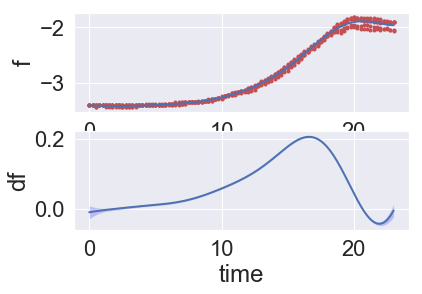

In [23]:
# data
t = np.array(wt_gly_data['time'])
od = np.array(wt_gly_data['value'])

# run inference
q = fitderiv(t, od)

# plot results
plt.figure()
plt.subplot(2,1,1)
q.plotfit('f')
plt.subplot(2,1,2)
q.plotfit('df')
plt.show()